In [5]:
import torch
from torch.utils.data import DataLoader

from activation.acts import get_activations
from util.utils import vis_activations
from data.datasets import MNIST
from model.models import BasicMLP
from experiment import Trainer

In [ ]:
acts = get_activations(return_type='dict')
acts

{'SoftModulusQ': SoftModulusQ(),
 'Modulus': Modulus(),
 'BipolarSigmoid': BipolarSigmoid(),
 'TanhExp': TanhExp(),
 'BipolarClippedUnit': BipolarClippedUnit()}

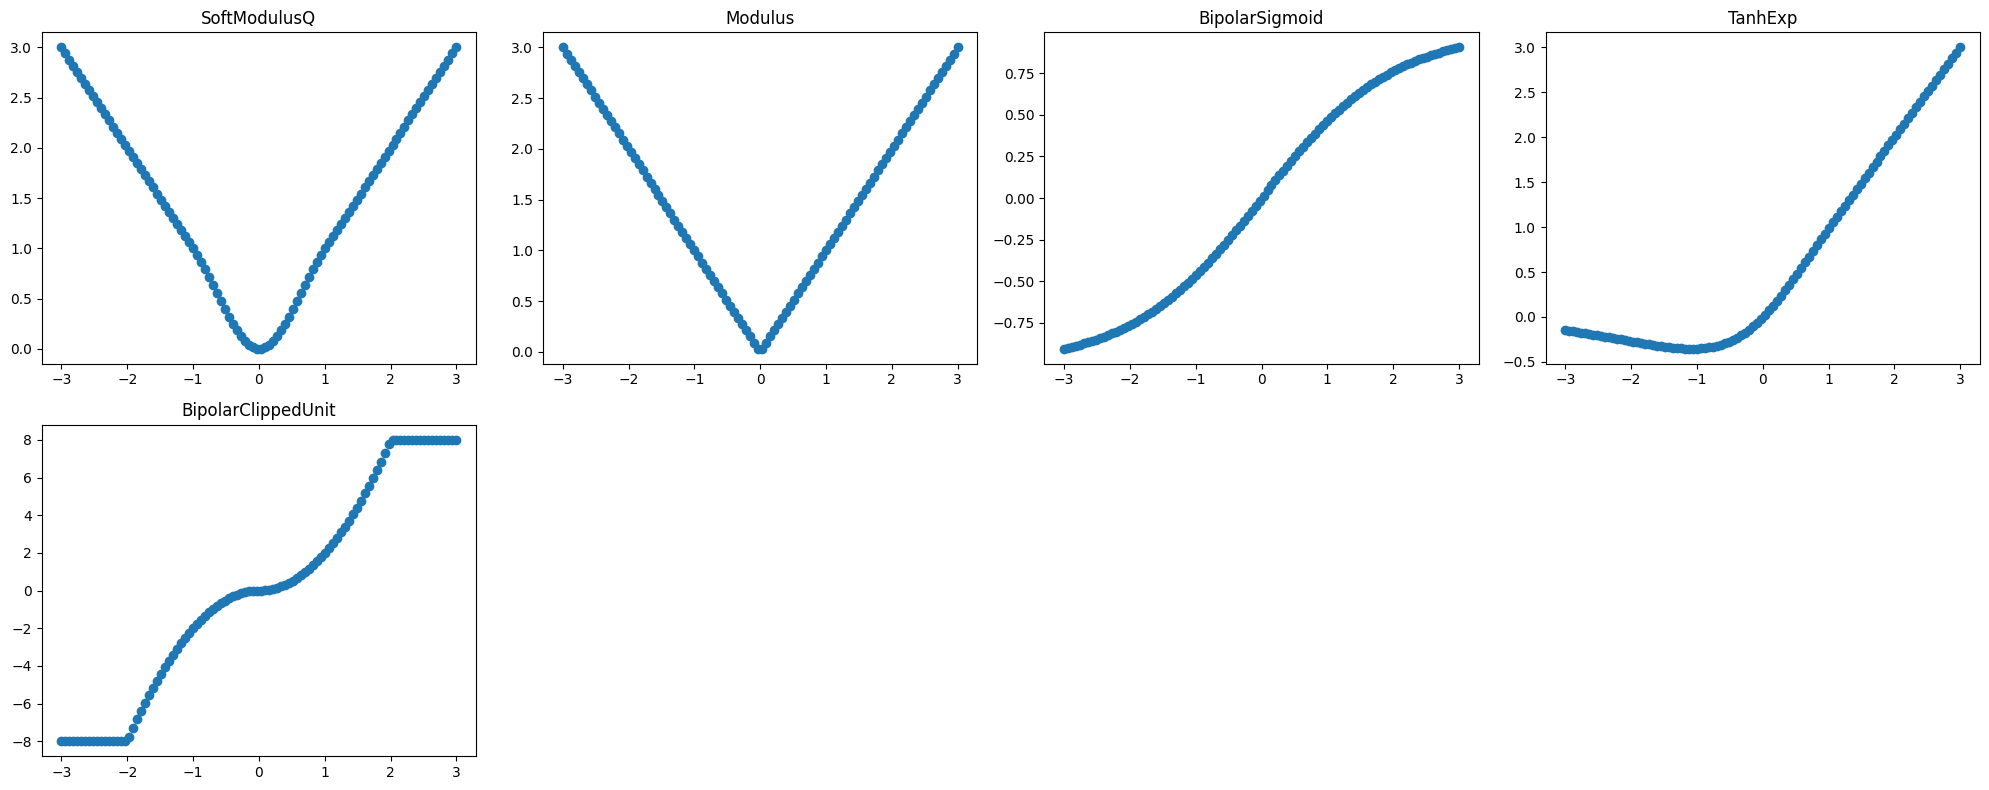

In [ ]:
# visualize activation functions
x = torch.linspace(-3, 3, 100)

vis_activations(acts.values(), x, cols=4)


In [3]:
train_dataset = MNIST(train=True)
test_dataset = MNIST(train=False)

train_loader = DataLoader(dataset=train_dataset, batch_size=2048, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=2048, shuffle=False)


In [ ]:
# model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)



num_epochs = 20
learning_rate = 0.001
model = BasicMLP(input_size = 784,
                 hidden_size = 128,
                 num_classes = 10,
                 activation_function=None)
trainer = Trainer()